In [16]:
'''
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
'''
import numpy as np
#import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


## Question 1

In [4]:
################
# Question 1
################
reward1 = np.zeros((10,10))
reward1[9,9] = 1

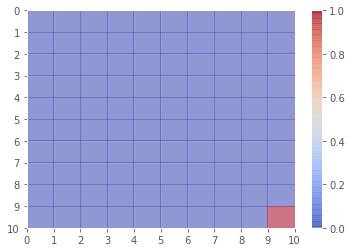

In [5]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward1, cmap = "coolwarm", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

In [6]:
reward2 = np.zeros((10,10))
reward2[1:7,4] = -100
reward2[3:8,8] = -100
reward2[1,5] = -100
reward2[1:4,6] = -100
reward2[7:9,6] = -100
reward2[3,7] = -100
reward2[7,7] = -100
reward2[9,9] = 10

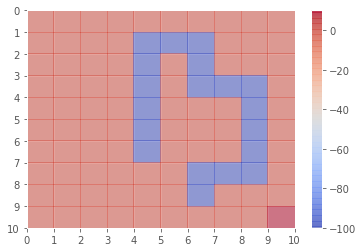

In [7]:
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.pcolor(reward2, cmap = "coolwarm", alpha = 0.5)
plt.colorbar()
plt.grid()
plt.show()

## Question 2 - 9

In [17]:
class MDP():
    
    def __init__(self, V=None, delta=None, epsilon=None, gamma=None,
                  w=None, reward=None, action=None) :
        self.V = V # V is reward matrix 
        self.delta = None
        self.epsilon = epsilon
        self.gamma = gamma
        self.w = w
        self.reward = reward
        self.action = None
        self.updated = 0
        
    def value_calc(self, x, y, action):
        m,n = self.reward.shape
       
        p_intent = 1 - 0.75 * self.w
        p_unintent = 0.25 * self.w
        probability = [p_unintent]*4
        if action == "up":
            probability[0] = p_intent
        elif action == "left":
            probability[1] = p_intent
        elif action == "right":
            probability[2] = p_intent
        elif action == "down":
            probability[3] = p_intent
        
        reward=[self.reward[max(x-1,0),y],self.reward[x,max(y-1,0)],self.reward[x,min(y+1,n-1)],self.reward[min(x+1,m-1),y]]
        next_location=[self.V[max(x-1,0),y],self.V[x,max(y-1,0)],self.V[x,min(y+1,n-1)],self.V[min(x+1,m-1),y]]
 
        return sum([probability[i]*(reward[i]+self.gamma*next_location[i]) for i in range(0,4)])
    
    def look_forward(self, x, y):
        actions = ["right","up","left","down"]
        potential_values = [self.value_calc(x, y, action=action) for action in actions]
       
        max_index = argmax(potential_values)
        max_value = potential_values[max_index]
       
        return(max_value, max_index)
    
    def update(self):
        if np.any(self.reward == None):
            raise Exception("Initialize reward function completely!")
        
        m,n = self.reward.shape
        self.V = np.zeros((10,10))
        self.delta = 1e20 # shuld be a very large number
        self.action = np.zeros((10,10)) # action matrix
            
        print("Runnning Value iteration algorithm ... ")
        iterations = 0
        while self.delta > self.epsilon:
            self.delta = 0
            iterations = iterations + 1
            for i in np.arange(0,m):
                for j in np.arange(0,n):
                    previous = self.V[i,j]
                    update_value, opt_action = self.look_forward(i,j)
                    self.V[i,j] = update_value
                    self.delta = max(self.delta, np.abs(update_value - previous))
                
            if iterations % 10 == 0:
                print(iterations)
                print("delta = {}".format(self.delta))
        
        
        for i in np.arange(0,m):
                for j in np.arange(0,n):
                    update_value, opt_action = self.look_forward(x=i,y=j)
                    self.action[i,j] = opt_action
        
        print("Optimum delta = {}".format(self.delta))
        print("Done!")
    
    def plot_action(self):
        m,n = self.reward.shape
        X = np.arange(0.5, m, 1)
        Y = np.arange(0.5, n, 1)
        U = np.cos(self.action * np.pi / 2)
        V = np.sin(self.action * np.pi / 2)
        
        plt.figure()
        ax = plt.gca()
        ax.invert_yaxis()
        ax.set_xticks(np.arange(0, 11, 1))
        ax.set_yticks(np.arange(0, 11, 1))
        
        plt.title("Actions")
        plt.pcolor(self.reward, alpha=0.5,cmap = "coolwarm")
        plt.quiver(X, Y, U, V, units='x',pivot='mid')
        plt.grid()
        plt.show()
    
    def plot_value(self):
        fig = plt.figure()
        ax = plt.gca()
        ax.invert_yaxis()
        ax.set_xticks(np.arange(0, 11, 1))
        ax.set_yticks(np.arange(0, 11, 1))
        
        #heatmap = plt.pcolor(self.V, cmap = "coolwarm")
        for x in range(self.V.shape[0]):
            for y in range(self.V.shape[1]):
                plt.text(y + 0.5, x + 0.5, '%.3f' % self.V[x, y],
                         horizontalalignment='center',
                         verticalalignment='center',
                         fontsize=10,
                         color='black'
                         )
        #plt.colorbar(heatmap)
        plt.grid()
        plt.show()

Runnning Value iteration algorithm ... 
10
delta = 0.12052571187470829
20
delta = 0.01200068146059638
Optimum delta = 0.009542522841845001
Done!


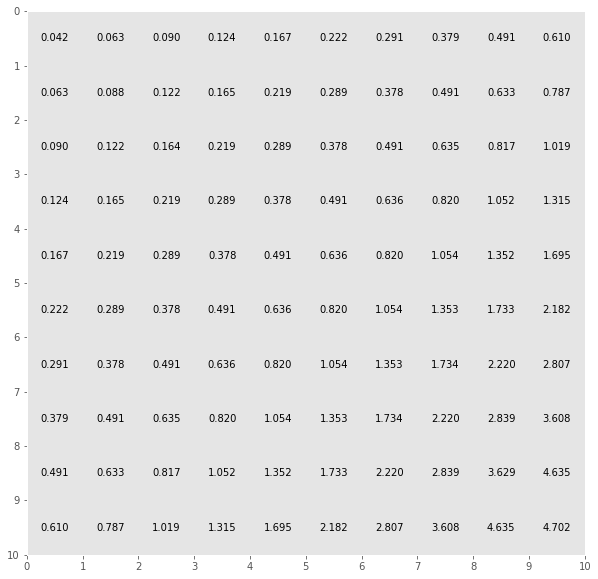

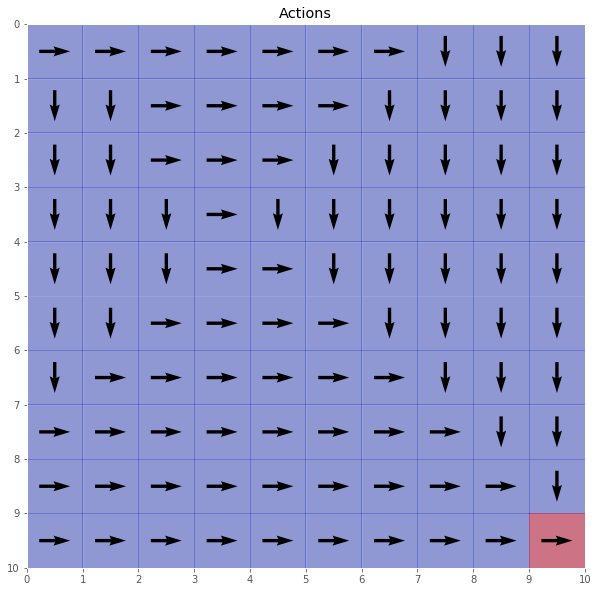

In [18]:
# reward 1
mdp_process = MDP()
mdp_process.reward = reward1
mdp_process.delta = 1e10 # should be a very large number
mdp_process.epsilon = 0.01
mdp_process.gamma = 0.8
mdp_process.w = 0.1

mdp_process.update()

mdp_process.plot_value()
mdp_process.plot_action()

In [19]:
# reward2
mdp_process2 = MDP()
mdp_process2.reward = reward2
mdp_process2.delta = 1e10 # should be a very large number
mdp_process2.epsilon = 0.01
mdp_process2.gamma = 0.8
mdp_process2.w = 0.1
mdp_process2.update()

Runnning Value iteration algorithm ... 
10
delta = 1.2048120096708175
20
delta = 0.12005715637385583
30
delta = 0.011861775462376434
Optimum delta = 0.009390572496691174
Done!


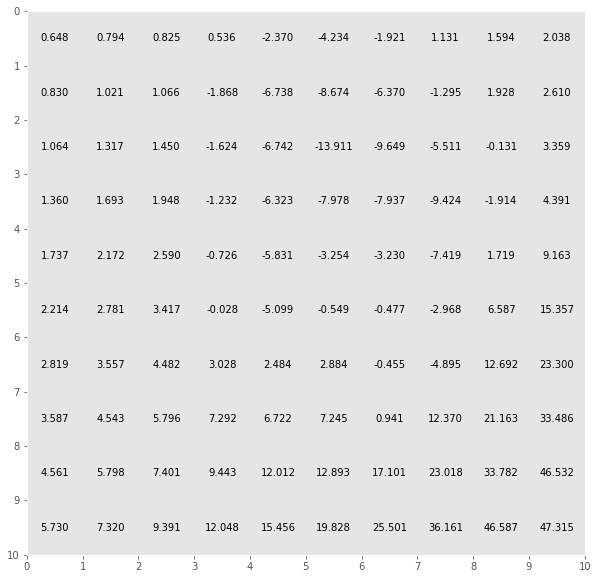

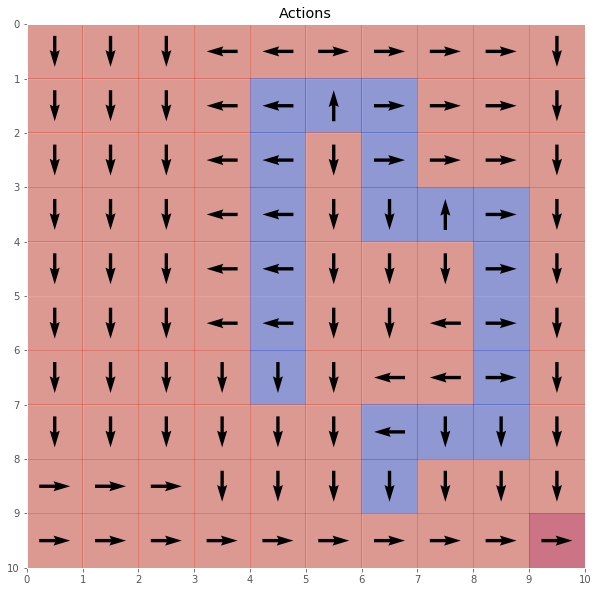

In [20]:
mdp_process2.plot_value()
mdp_process2.plot_action()